In [11]:
import sys
import os

sys.path.append('..')

from PIL import ImageFont

from comic_ocr.types import Size
from comic_ocr.utils.files import load_images, load_texts, get_path_project_dir
from comic_ocr.utils.ploting import show_images

# Prepare the data for generator

In [25]:
generator_input_dir = get_path_project_dir('data/')

print(os.path.abspath(generator_input_dir))
print(os.listdir(generator_input_dir))

/home/ubuntu/Dropbox/Workspace_Personal/manga-ocr/data
['train', 'drawings', 'manga_line_annotated', 'manga_line_annotated_no_text', 'manga_unannotated', 'logs', 'manga_line_init', 'output', 'fonts', 'init_image_data.py', 'text', 'others']


### Prepare the data for generator > Drawings

choices_drawings 77


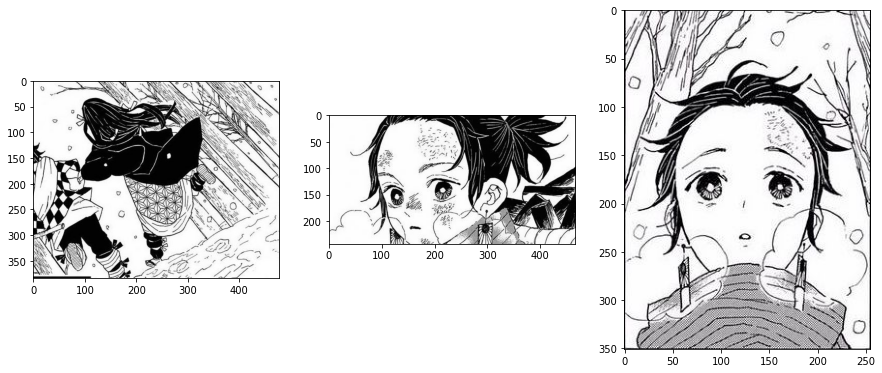

In [27]:
choices_drawings, _ = load_images(generator_input_dir + '/drawings/*')

print('choices_drawings', len(choices_drawings))
show_images(choices_drawings[:3])

### Prepare the data for generator > Fonts

In [28]:
choices_fonts = [] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Augie.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Augie.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Augie.ttf', size=22)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Cool_Cat.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Cool_Cat.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Cool_Cat.ttf', size=21)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/ComicRelief.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/ComicRelief.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/ComicRelief.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/ComicRelief.ttf', size=20)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/IndieFlower.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/IndieFlower.ttf', size=23)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/IndieFlower.ttf', size=28)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Komika_Display.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Komika_Display.ttf', size=20)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Komika_Text.ttf', size=15)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Komika_Text.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Komika_Text.ttf', size=24)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Mendalion.otf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/OpenSans.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/OpenSans.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/OpenSans.ttf', size=18)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/OpenSans.ttf', size=20)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Queensides.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/TheRifleman.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Sweet_Iced_Coffee.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/SF_Cartoonist_Hand.ttf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/SF_Cartoonist_Hand.ttf', size=20)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Warung_Kopi.otf', size=16)] + \
                [ImageFont.truetype(generator_input_dir + '/fonts/Warung_Kopi.otf', size=20)]

print('choices_fonts', len(choices_fonts))

choices_fonts 30


### Prepare the data for generator > Texts (or Quotes)

In [34]:
choices_texts = load_texts(generator_input_dir + '/text/texts.txt')
choices_texts = [text for text in choices_texts if len(text) < 100]

print('choices_texts', len(choices_texts))
print(choices_texts[:3])

choices_texts 8875
['http://google.com', 'pixel.com/abc', 'Liuyuan, did anything happen?']


# Create Generator

In [30]:
from comic_ocr.dataset.generated_manga import MangaGenerator

<PIL.Image.Image image mode=RGB size=750x500 at 0x7FE6DD054C40>
[TextBubble(xy=(498, 184), text='The Rise of G.o.ds.'), TextRect(xy=(511, 62), text='Grat.i.tude received from Jiao Xiaochen, +1!', rect_padding=3, rect_fill_color=(255, 255, 255, 250), rect_outline_width=1, rect_outline_color='#000000'), TextBubble(xy=(281, 106), text='battles'), TextRect(xy=(178, 316), text='We’ve arrived at 13th High!', rect_padding=3, rect_fill_color=(255, 255, 255, 250), rect_outline_width=1, rect_outline_color='#000000')]


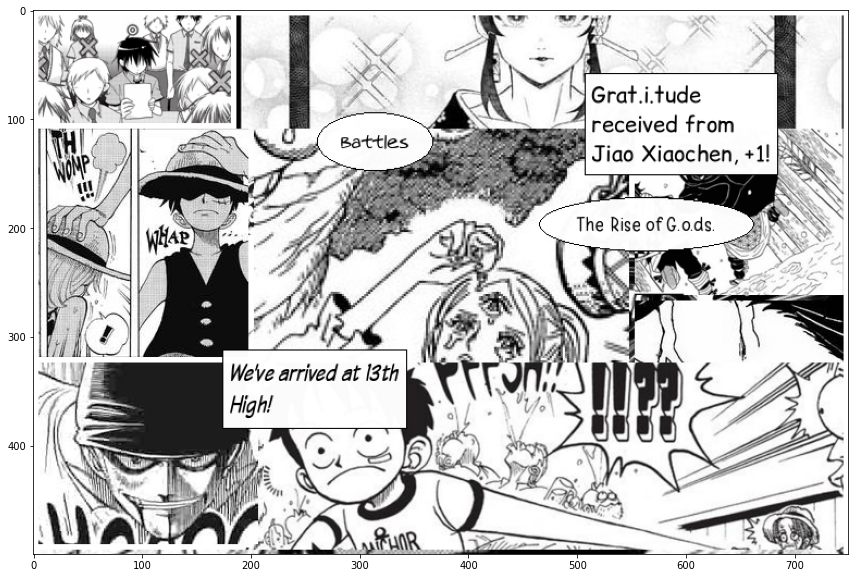

In [31]:
generator = MangaGenerator.create(
    choices_drawings=choices_drawings,
    choices_texts=choices_texts,
    choices_fonts=choices_fonts,
    choices_text_counts=[3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7],
    random_salt='ab')

image, texts = generator.generate(output_size=(750, 500), random_seed='1')
print(image)
print(texts)
show_images(image)

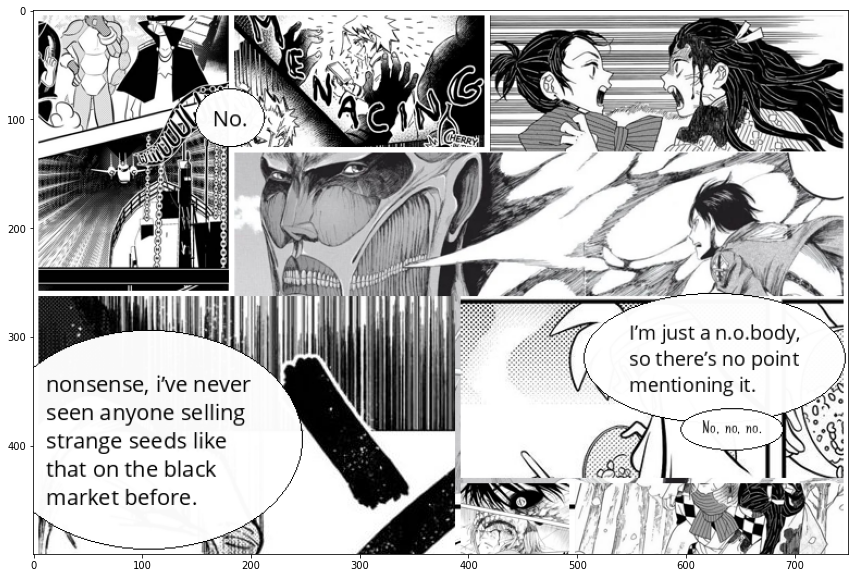

In [32]:
image, texts = generator.generate(output_size=(750, 500))
show_images(image)

# Create dataset

In [33]:
from comic_ocr.dataset.generated_manga import create_dataset

create_dataset(
    generator=generator,
    dataset_dir=get_path_project_dir('data/output/generate_manga_dataset'),
    output_size=Size.of(750, 1500),
    output_count=500,
)

In [18]:
test_fonts = [ImageFont.truetype(generator_input_dir + '/fonts/ComicRelief.ttf', size=14)]
generator = MangaGenerator.create(
    choices_drawings=choices_drawings,
    choices_texts=choices_texts,
    choices_fonts=test_fonts,
    choices_text_counts=[3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7],
    random_salt='ab')

image, _ = generator.generate(output_size=(750, 500), random_seed='1')
show_images(image)